In [16]:
from math import pi

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from fompy.constants import eV, me
from fompy.models import KronigPenneyModel
from fompy.units import unit


matplotlib.rc('axes.formatter', useoffset=False)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (5, 5)

# Kronig-Penney model equation
## $\cos(\alpha a) \cos(\beta b) - \frac{\alpha^2 + \beta^2}{2 \alpha \beta} \sin(\alpha a) \sin(\beta b) = \cos(k (a + b))$
## where $\alpha^2 = \frac{2 m (E - U_0)}{\hbar^2}; \beta^2 = \frac{2 m E}{\hbar^2}$

## Set params
### a: The width of a well
### b: The distance between two wells

In [17]:
# for electrons
# m = 0.08 * me
# U0 = -0.494 * eV

# for holes
m = -0.6 * me
U0 = 0.392 * eV

a = 5 * unit('nm')
b = 7 * unit('nm')

kp_model = KronigPenneyModel(a, b, U0)
E = np.linspace(0, -U0, int(1e3))

## Get the k*(a+b) vector

In [18]:
k = kp_model.get_ks(E, m)

## Plot E(q)

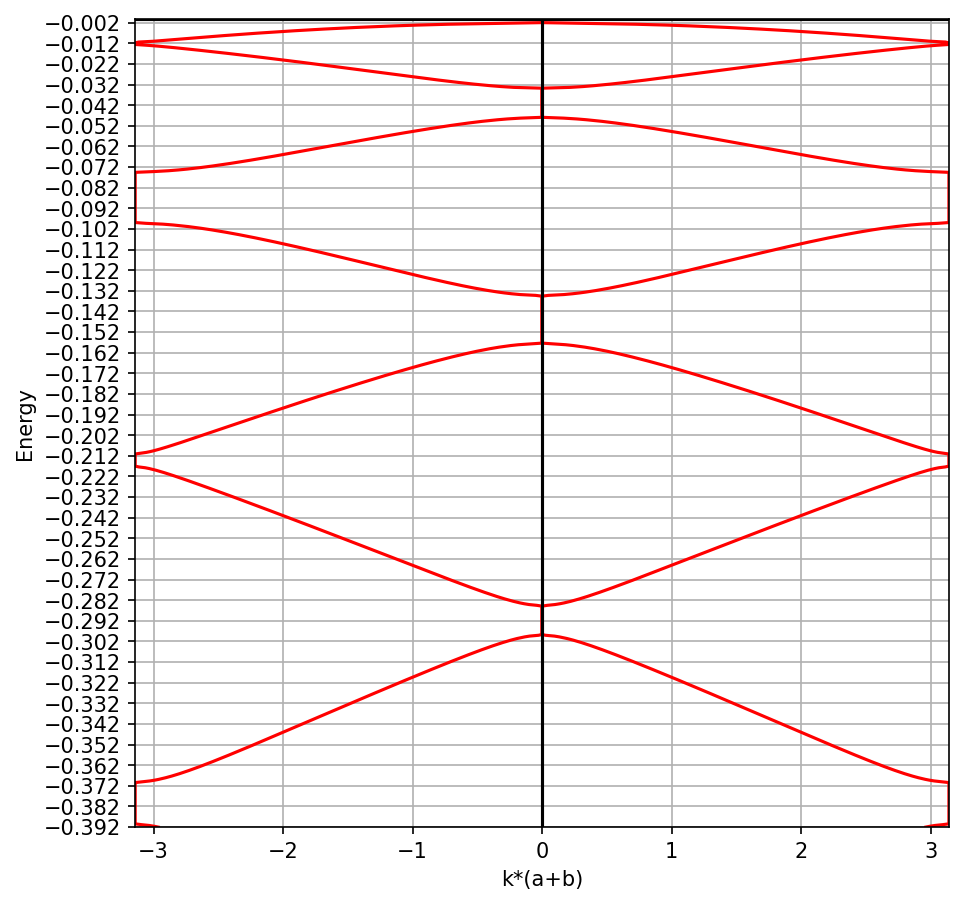

In [19]:
plt.figure(figsize=(7, 7), dpi=150)
plt.plot(k, E / eV, c='r')
plt.plot(-k, E / eV, c='r')
# plt.yticks(np.arange(0, -U0 / eV, 1e-2)) # for electrons
plt.yticks(np.arange(-U0 / eV, 0, 1e-2)) # for holes
plt.axhline(0, color='k', linestyle='-')
plt.axvline(0, color='k', linestyle='-')
plt.xlim(-pi, pi)
# plt.ylim([0, -U0 / eV]) # for electrons
plt.ylim([-U0 / eV, 0]) # for holes
plt.xlabel("k*(a+b)")
plt.ylabel("Energy")
plt.grid()
plt.show()